In [1]:
import pandas as pd
import numpy as np
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import xlsxwriter

In [2]:
df_row_data = pd.read_excel("数据.xlsx")
print(df_row_data)

     业务部门 业务主管         日期      目标     本月累计业绩     目标达成率      时间进度      昨日业绩  \
0     亚马逊   耿强 2020-09-01  400000   14422.58  0.033333  0.036056  14422.58   
1     亚马逊   耿强 2020-09-02  400000   29340.09  0.066667  0.073350  14917.51   
2     亚马逊   耿强 2020-09-03  400000   41247.33  0.100000  0.103118  11907.24   
3     亚马逊   耿强 2020-09-04  400000   51280.02  0.133333  0.128200  10032.69   
4     亚马逊   耿强 2020-09-05  400000   61645.38  0.166667  0.154113  10365.36   
..    ...  ...        ...     ...        ...       ...       ...       ...   
117  ebay  刘阿德 2020-10-27  400000  352739.78  0.870968  0.881849  12874.49   
118  ebay  刘阿德 2020-10-28  400000  363921.82  0.903226  0.909805  11182.04   
119  ebay  刘阿德 2020-10-29  400000  376043.13  0.935484  0.940108  12121.31   
120  ebay  刘阿德 2020-10-30  400000  390184.26  0.967742  0.975461  14141.13   
121  ebay  刘阿德 2020-10-31  400000  403058.75  1.000000  1.007647  12874.49   

           昨日毛利  广告费 /广告带来销售额  ...  预计本月总库存数量/金额 （可售 xx天）  \
0 

In [3]:
#clean data
print(df_row_data.columns)
print(type(df_row_data))

Index(['业务部门', '业务主管', '日期', '目标', '本月累计业绩', '目标达成率', '时间进度', '昨日业绩', '昨日毛利',
       '广告费 /广告带来销售额', '在库库存数量', '在库库存数量金额', '在途库存数量 ', '在途库存数量金额',
       '预计本月总库存数量/金额 （可售 xx天）', '预计下月预计本月总库存数量/金额 （可售 xx天）', '账户健康状况', '部门人数',
       '业绩人效', '毛利人效', '流量', '曝光', '转换率',
       '勤奋度指数公司排名：  名 （通过考勤数据，算出上班时长，利用上班时长排名）'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [4]:
df_data = pd.DataFrame(df_row_data,columns = ['业务主管','日期','目标达成率','时间进度','昨日业绩','在库库存数量','在库库存数量金额'])

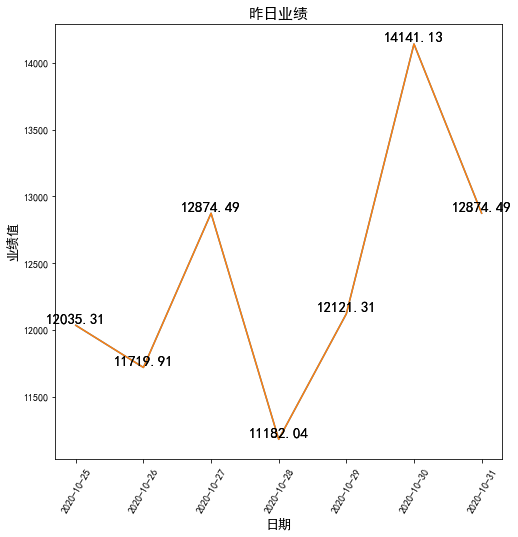

In [11]:
#昨日业绩图
def seven_yesterday_performance():
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8,8))
    for name in df_data['业务主管'].drop_duplicates():
        df_temp = df_data.loc[df_data['业务主管'] == name]
        y = df_temp['昨日业绩'].tail(7)
        x = df_temp['日期'].tail(7) 
        plt.plot(x,y)
        plt.title("昨日业绩", fontsize = 15)
        plt.xlabel('日期', fontsize = 13)
        plt.ylabel('业绩值', fontsize = 13)
        plt.xticks(fontsize = 10,rotation = 60)
        plt.yticks(fontsize = 10)
        for a, b in zip(x, y):
            plt.text(a, b, b, ha='center', va='bottom', fontsize=15)
        plt.savefig("昨日业绩_%s.jpg" % name)

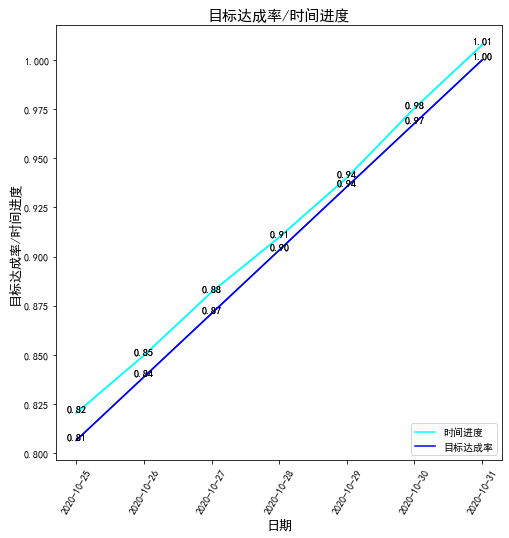

In [12]:
#目标达成率/时间进度
def seven_TargetAchievementRatio():
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize = (8,8))
    for name in df_data['业务主管'].drop_duplicates():
        df_temp = df_data.loc[df_data['业务主管'] == name]
        y1 = df_temp['时间进度'].tail(7)
        y2 = df_temp['目标达成率'].tail(7)
        x = df_temp['日期'].tail(7) 
        plt.plot(x, y1, color='cyan', label='sinx')
        plt.plot(x, y2, 'b', label='cosx')
        plt.title("目标达成率/时间进度", fontsize = 15)
        plt.xlabel('日期', fontsize = 13)
        plt.ylabel('目标达成率/时间进度', fontsize = 13)
        plt.legend(['时间进度', '目标达成率'], loc='lower right', scatterpoints=1)
        plt.xticks(fontsize = 10,rotation = 60)
        plt.yticks(fontsize = 10)
        for a, b in zip(x, y1):
            plt.text(a,b,format(b,'.2f'),ha='center',va='bottom')
        for a, b in zip(x, y2):
            plt.text(a,b,format(b, '.2f'),ha='center',va='bottom')
        plt.savefig("目标达成率and时间进度_%s.jpg" % name)

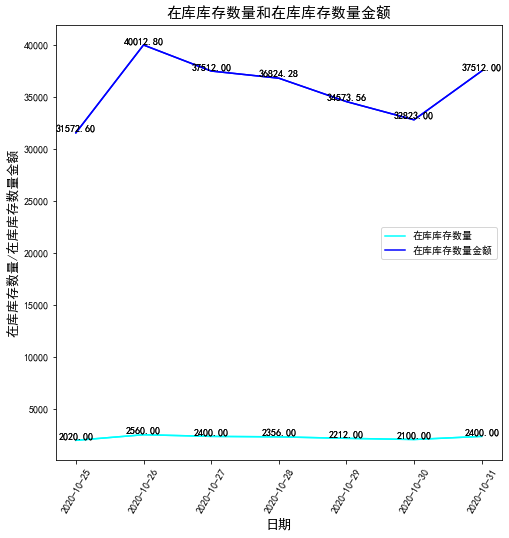

In [13]:
#在库库存数量和在库库存数量金额
def seven_StockQuantity():
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize = (8,8))
    for name in df_data['业务主管'].drop_duplicates():
        df_temp = df_data.loc[df_data['业务主管'] == name]
        y1 = df_temp['在库库存数量'].tail(7)
        y2 = df_temp['在库库存数量金额'].tail(7)
        x = df_temp['日期'].tail(7) 
        plt.plot(x, y1, color='cyan', label='sinx')
        plt.plot(x, y2, 'b', label='cosx')
        plt.title("在库库存数量和在库库存数量金额", fontsize = 15)
        plt.xlabel('日期', fontsize = 13)
        plt.ylabel('在库库存数量/在库库存数量金额', fontsize = 13)
        plt.legend(['在库库存数量', '在库库存数量金额'], loc='right', scatterpoints=1)
        plt.xticks(fontsize = 10,rotation = 60)
        plt.yticks(fontsize = 10)
        for a, b in zip(x, y1):
            plt.text(a,b,format(b,'.2f'),ha='center',va='bottom')
        for a, b in zip(x, y2):
            plt.text(a,b,format(b, '.2f'),ha='center',va='bottom')
        plt.savefig("在库库存数量和在库库存数量金额_%s.jpg" % name)

In [14]:
def creatExcel():
    workbook = xlsxwriter.Workbook('1Excel.xlsx')
    writer = pd.ExcelWriter("1Excel.xlsx",engine='openpyxl')
    for name in df_data['业务主管'].drop_duplicates():
        df_temp = df_data.loc[df_data['业务主管'] == name]
        sheet = workbook.add_worksheet(name)
        sheet.write(0,0,name)
        sheet.write(1,2,"目标")
        sheet.write(1,5,"7天趋势图")
        sheet.write(1,19,"15天趋势图")
        sheet.write(5,2,"目标达成率/时间进度")
        sheet.write(44,2,"昨日业绩")
        sheet.write(88,2,"在库库存数量和在库库存数量金额")
        sheet.insert_image('F5','目标达成率and时间进度_%s.jpg' % name)
        sheet.insert_image('F44','昨日业绩_%s.jpg' % name)
        sheet.insert_image('F88','在库库存数量和在库库存数量金额_%s.jpg' % name)
    workbook.close()